

# The "occasionally dishonest casino" HMM

We use the [ssm-jax](https://github.com/probml/ssm-jax/blob/main/ssm_jax/) library.



In [3]:
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install -qq matplotlib.pyplot
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install -qq seaborn
    import seaborn as sns
%matplotlib inline

import numpy as np


try:
    import probml_utils as pml
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
    from probml_utils import savefig, latexify
%pip install -qq git+https://github.com/probml/ssm-jax.git

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [7]:
try:
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results, plot_inference
except ModuleNotFoundError:
    %pip install -qq ssm_jax
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results, plot_inference

In [5]:
latexify(width_scale_factor=3.2, fig_height=1.5)

/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [8]:
hmm, true_states, emissions = make_model_and_data()
posterior = hmm.smoother(emissions)
most_likely_states = hmm.most_likely_states(emissions)

In [11]:
print(hmm)

In [14]:
print(true_states.shape)
print(emissions.shape)

(300,)
(300, 1)


In [24]:
def print_seq(true_states, emissions):
    print("Printing sample observed/latent...")
    T = 80
    to_string = lambda x: "".join((np.array(x) + 1).astype(str))
    print("hid: ", to_string(true_states[:T]))
    print("obs: ", to_string(emissions[:T, 0]))

In [25]:
print_seq(true_states, emissions)

Printing sample observed/latent...
hid:  11111111112222111111111111111111111122222222212222111111111111111111111122222222
obs:  13555345265533663163515515262321121134622212632642654223446453232423615264113466


In [34]:
# count fraction of times we see 6 in each state

obs = emissions[:,0]+1;
hid = true_states+1;
p0 = np.mean(obs[hid==1] == 6); # fair
p1 = np.mean(obs[hid==2] == 6); # loaded
print(np.array([p0, p1]))
print([1.0/6, 5.0/10])

[0.14948453 0.4716981 ]
[0.16666666666666666, 0.5]


In [29]:
def plot_posteriors(true_states, emissions, posterior, most_likely_states):

    fig, ax = plt.subplots()
    plot_inference(posterior.filtered_probs, true_states, ax)
    ax.set_ylabel("p(loaded)")
    ax.set_title("Filtered")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_filter")

    fig, ax = plt.subplots()
    plot_inference(posterior.smoothed_probs, true_states, ax)
    ax.set_ylabel("p(loaded)")
    ax.set_title("Smoothed")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_smooth")

    fig, ax = plt.subplots()
    plot_inference(most_likely_states, true_states, ax, map_estimate=True)
    ax.set_ylabel("MAP state")
    ax.set_title("Viterbi")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_map")




<ipython-input-29-b2578987d5c8>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
<ipython-input-29-b2578987d5c8>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
<ipython-input-29-b2578987d5c8>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/opt/anaconda3/lib/python3.8/site

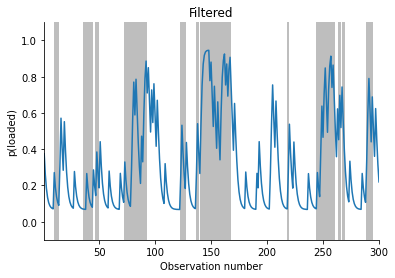

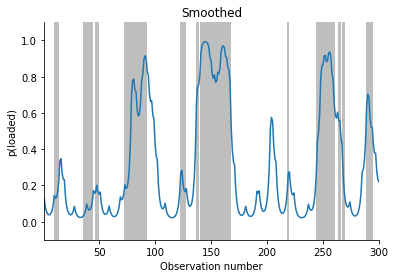

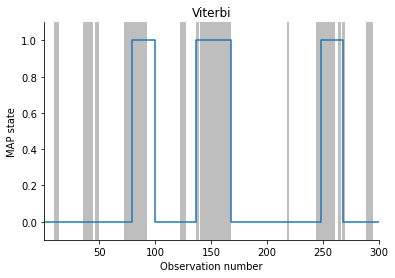

In [30]:
%matplotlib inline

plot_posteriors(true_states, emissions, posterior, most_likely_states)